<a href="https://colab.research.google.com/github/krakowiakpawel9/ml_course/blob/master/ul/08_pca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### scikit-learn
Strona biblioteki: [https://scikit-learn.org](https://scikit-learn.org)  

Dokumentacja/User Guide: [https://scikit-learn.org/stable/user_guide.html](https://scikit-learn.org/stable/user_guide.html)

Podstawowa biblioteka do uczenia maszynowego w języku Python.

Aby zainstalować bibliotekę scikit-learn, użyj polecenia poniżej:
```
!pip install scikit-learn
```
Aby zaktualizować do najnowszej wersji bibliotekę scikit-learn, użyj polecenia poniżej:
```
!pip install --upgrade scikit-learn
```
Kurs stworzony w oparciu o wersję `0.22.1`

### Spis treści:
1. [Import bibliotek](#0)
2. [Wygenerowanie danych](#1)
3. [Wizualizacja danych](#2)
4. [Algorytm K-średnich](#3)
5. [Wizualizacja klastrów](#4)




### <a name='0'></a> Import bibliotek

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

np.set_printoptions(precision=6, suppress=True, edgeitems=10)
sns.set()

In [2]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None, sep=',')
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


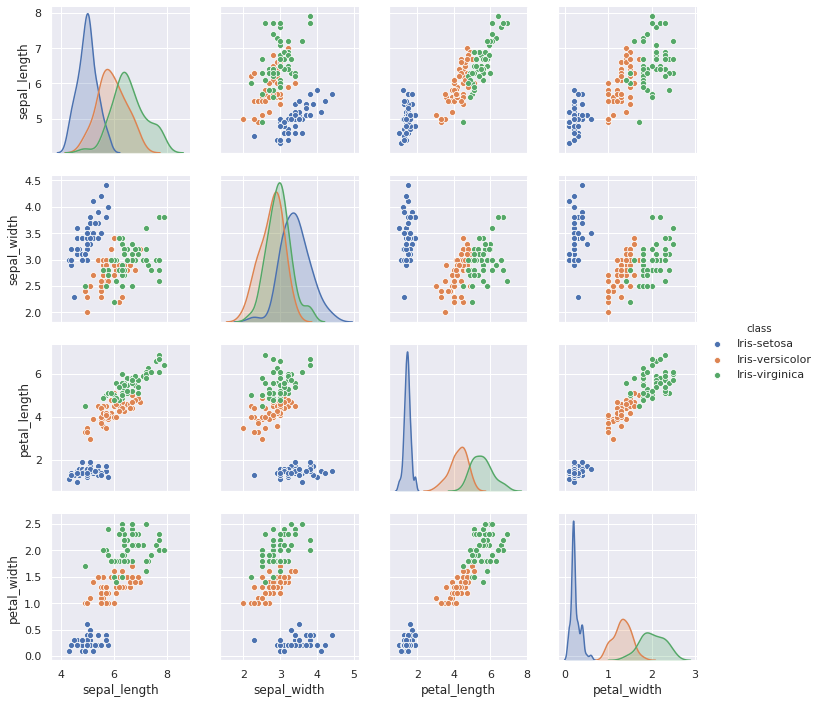

In [3]:
_ = sns.pairplot(df, hue='class')

In [4]:
data = df.copy()
target = data.pop('class')
data.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
target.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: class, dtype: object

Standaryzacja

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_std = scaler.fit_transform(data)
data_std[:10]

array([[-0.900681,  1.032057, -1.341272, -1.312977],
       [-1.143017, -0.124958, -1.341272, -1.312977],
       [-1.385353,  0.337848, -1.398138, -1.312977],
       [-1.506521,  0.106445, -1.284407, -1.312977],
       [-1.021849,  1.26346 , -1.341272, -1.312977],
       [-0.537178,  1.957669, -1.170675, -1.050031],
       [-1.506521,  0.800654, -1.341272, -1.181504],
       [-1.021849,  0.800654, -1.284407, -1.312977],
       [-1.748856, -0.356361, -1.341272, -1.312977],
       [-1.143017,  0.106445, -1.284407, -1.44445 ]])

PCA 2

In [7]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_std)
data_pca[:10]

array([[-2.264542,  0.505704],
       [-2.086426, -0.655405],
       [-2.36795 , -0.318477],
       [-2.304197, -0.575368],
       [-2.388777,  0.674767],
       [-2.070537,  1.518549],
       [-2.445711,  0.074563],
       [-2.233842,  0.247614],
       [-2.341958, -1.095146],
       [-2.188676, -0.448629]])

In [8]:
pca_2 = pd.DataFrame(data={'pca_1': data_pca[:, 0], 'pca_2': data_pca[:, 1], 'class': target})
pca_2.head()

,pca_1,pca_2,class
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa


In [9]:
pca.components_

array([[ 0.522372, -0.263355,  0.581254,  0.565611],
       [ 0.372318,  0.925556,  0.021095,  0.065416]])

In [10]:
pca.explained_variance_ratio_

array([0.727705, 0.230305])

In [11]:
results = pd.DataFrame(data={'explained_variance_ratio': pca.explained_variance_ratio_})
results['cumulative'] = results['explained_variance_ratio'].cumsum()
results

,explained_variance_ratio,cumulative
0,0.727705,0.727705
1,0.230305,0.958010


In [23]:
fig = go.Figure(data=[go.Bar(x=results.index, y=results['explained_variance_ratio'], name='explained_variance_ratio'),
                      go.Scatter(x=results.index, y=results['cumulative'], name='cumulative')],
                layout=go.Layout(title='PCA - 2 components', width=700))
fig.show()

In [18]:
px.scatter(pca_2, 'pca_1', 'pca_2', color=pca_2['class'], width=700)

PCA 3

In [24]:
pca = PCA(n_components=3)
data_pca = pca.fit_transform(data_std)
data_pca[:10]

array([[-2.264542,  0.505704, -0.121943],
       [-2.086426, -0.655405, -0.227251],
       [-2.36795 , -0.318477,  0.05148 ],
       [-2.304197, -0.575368,  0.09886 ],
       [-2.388777,  0.674767,  0.021428],
       [-2.070537,  1.518549,  0.030684],
       [-2.445711,  0.074563,  0.342198],
       [-2.233842,  0.247614, -0.082574],
       [-2.341958, -1.095146,  0.153562],
       [-2.188676, -0.448629, -0.24656 ]])

In [25]:
pca_3 = pd.DataFrame(data={'pca_1': data_pca[:, 0], 'pca_2': data_pca[:, 1], 'pca_3': data_pca[:, 2], 'class': target})
pca_3.head()

,pca_1,pca_2,pca_3,class
0,-2.264542,0.505704,-0.121943,Iris-setosa
1,-2.086426,-0.655405,-0.227251,Iris-setosa
2,-2.367950,-0.318477,0.051480,Iris-setosa
3,-2.304197,-0.575368,0.098860,Iris-setosa
4,-2.388777,0.674767,0.021428,Iris-setosa


In [26]:
results = pd.DataFrame(data={'explained_variance_ratio': pca.explained_variance_ratio_})
results['cumulative'] = results['explained_variance_ratio'].cumsum()
results

,explained_variance_ratio,cumulative
0,0.727705,0.727705
1,0.230305,0.958010
2,0.036838,0.994848


In [28]:
fig = go.Figure(data=[go.Bar(x=results.index, y=results['explained_variance_ratio'], name='explained_variance_ratio'),
                      go.Scatter(x=results.index, y=results['cumulative'], name='cumulative')],
                layout=go.Layout(title='PCA - 3 components', width=700))
fig.show()

In [36]:
px.scatter_3d(pca_3, x='pca_1', y='pca_2', z='pca_3', color='class', symbol='class', opacity=0.7, size_max=10, width=700)